# Question 3: Process Mining
You have received event data (process_mining/event_log.xes) of a financing organization
which offers loans to customers. The overall process is that customers apply for a
loan—this application is then either accepted or rejected. After a customer’s loan application
is accepted, the process of offering loans to customers begins. Every customer can be
presented with multiple offers, but only one offer can be accepted.
The event log you will analyse is the process of (literally!) coming to terms with the
customers of accepted loan applications—it begins after the loan application is accepted.
In the event log, every entry describes the state change of an offer, i.e., every entry refers
to:

1. the id of the loan application (case),
2. the state an offer was set to (activities), and
3. a timestamp.


Additionally, some information for the individual offers is included, such as the offer ID.
Use Python and [PM4Py3](https://processintelligence.solutions/static/api/2.7.11/) to load the data and analyze the process, thereby, answering the
following questions.

In [4]:
# Import Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import numpy as np

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

## Event Log Exploration
(a) (1.5 points) You first turn your attention to the activities in the event log.

- Provide a plot showing the absolute frequency of activities. The x-axis should
show every activity name and the y-axis should show every activity’s absolute
frequency. Make sure to label your axes and provide a title for the plot.
- How many events does the log contain?

Hint: No need to combine any activities in the event log, just leave the activities as
they are.

In [5]:
import pm4py
print(pm4py.__version__)

2.7.13


In [6]:
#import the xes-file event_log.xes
df = pm4py.read_xes('event_log.xes')
display(df.head())

parsing log, completed traces ::   0%|          | 0/11021 [00:00<?, ?it/s]

,concept:name,time:timestamp,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount
0,Create Offer,2016-01-02 14:45:25.611000+00:00,0.0,94.0,True,120.00,False,0.0,9000.0,NaN,"Other, see explanation",New credit,Application_387012864,5000.0
1,Created,2016-01-02 14:45:26.830000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1750007091,"Other, see explanation",New credit,Application_387012864,5000.0
2,Sent (mail and online),2016-01-02 14:46:43.295000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1750007091,"Other, see explanation",New credit,Application_387012864,5000.0
3,Cancelled,2016-02-02 07:00:36.975000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1750007091,"Other, see explanation",New credit,Application_387012864,5000.0
4,Create Offer,2016-01-02 09:55:46.369000+00:00,6900.0,53.0,True,150.73,True,1021.0,6900.0,NaN,Car,New credit,Application_1120819670,6850.0


In [7]:
# use pm4py's reformatting help. It transforms the event log into the dataframe format.
log_obj = pm4py.format_dataframe(df, case_id='case:concept:name', activity_key='concept:name', timestamp_key='time:timestamp', timest_format="yyyy-mm-dd hh:mm:ss")


In [8]:
display(log_obj.head())

,concept:name,time:timestamp,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,@@index,@@case_index
0,Create Offer,2016-04-04 16:12:03.476000+00:00,0.0,111.0,True,500.0,False,0.0,45000.0,NaN,Car,New credit,Application_1000311556,45000.0,0,0
1,Created,2016-04-04 16:12:04.732000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,1,0
2,Sent (mail and online),2016-04-04 16:15:45.527000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,2,0
3,Cancelled,2016-05-05 06:00:48.950000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,3,0
4,Create Offer,2016-02-26 14:00:45.194000+00:00,577.0,120.0,False,56.3,True,824.0,5000.0,NaN,Existing loan takeover,New credit,Application_100034150,5000.0,4,1


In [9]:
counts = log_obj["concept:name"].value_counts()
print(counts)

concept:name
Create Offer              15188
Created                   15188
Sent (mail and online)    13929
Returned                   8114
Cancelled                  7504
Accepted                   6011
Refused                    1605
Sent (online only)          773
Name: count, dtype: Int64


C:\Users\Joost\AppData\Local\Temp\ipykernel_29656\422038962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='concept:name', palette='Spectral', order=sorted_activites )


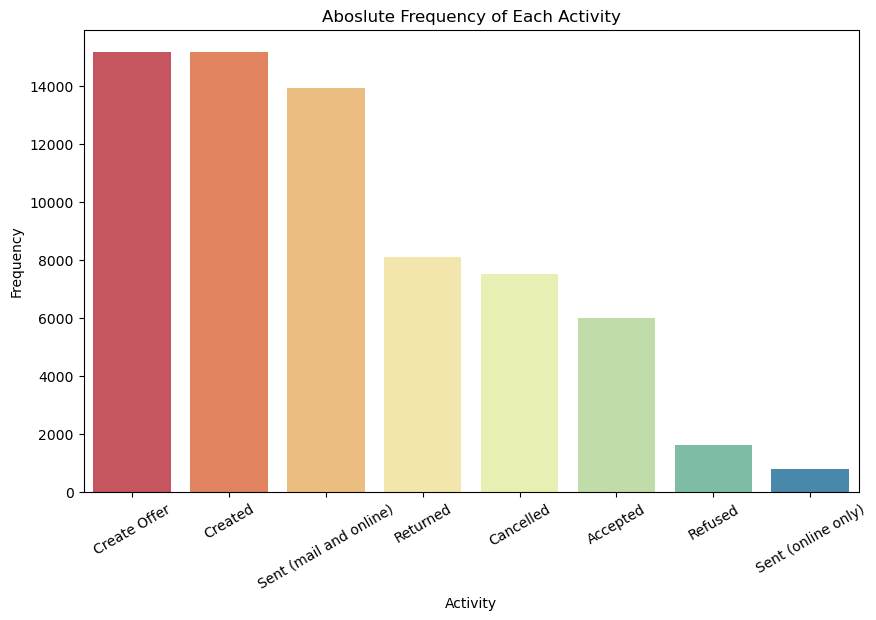

In [10]:
sorted_activites = log_obj['concept:name'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='concept:name', palette='Spectral', order=sorted_activites )
# counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Aboslute Frequency of Each Activity')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=30)
plt.show()

In [11]:
print(len(log_obj))

68312


(b) (1.5 points) Next, you want to look at the cases in the event log.
- How many cases are in the event log?
- What is the total number of offers made in the event log?
- Provide the mean number of offers per case.

In [12]:
# Create Series for unique cases and offers
cases = log_obj["case:concept:name"].value_counts()
offers = log_obj["OfferID"].value_counts()

# Account for 
cases.dropna(inplace=True)
offers.dropna(inplace=True)

display(f"Number of cases {len(cases)}")
display(f"Number of offers {len(offers)}")
display(f"Average amount of offers{len(offers)/len(cases)}")

'Number of cases 11021'

'Number of offers 15188'

'Average amount of offers1.3780963614916977'

## Process Exploration
Next, you want to gain a basic understanding of the process described in the data.

(c) (1 point) You first look at the start and end activities of the process. Create a plot, showing how often every activity is a start and/or end activity of a case. Your plot should have all activity names on the x-axis and the absolute frequency of the activity being a start/end activity on the y-axis. Distinguish between start and end activities by color. Make sure to label your axes and provide a title for the plot.

In [13]:
# Get the amount of start and end activities 
print('The start activities are:')
start_activities = pm4py.get_start_activities(log_obj)
display(start_activities)
print('The end activities are:')
end_activities = pm4py.get_end_activities(log_obj)
display(end_activities)

The start activities are:


{'Create Offer': 11021}

The end activities are:


{'Cancelled': 5253,
 'Accepted': 4442,
 'Refused': 1293,
 'Returned': 16,
 'Sent (mail and online)': 15,
 'Sent (online only)': 2}

In [14]:
# Convert the dictionaries into DataFrames and add the 'Type' column
start_df = pd.DataFrame(list(start_activities.items()), columns=['Activity', 'Count'])
start_df['Type'] = 'Start'

end_df = pd.DataFrame(list(end_activities.items()), columns=['Activity', 'Count'])
end_df['Type'] = 'End'

# Combine the two DataFrames
combined_df = pd.concat([start_df, end_df], ignore_index=True)

display(combined_df)

,Activity,Count,Type
0,Create Offer,11021,Start
1,Cancelled,5253,End
2,Accepted,4442,End
3,Refused,1293,End
4,Returned,16,End
5,Sent (mail and online),15,End
6,Sent (online only),2,End


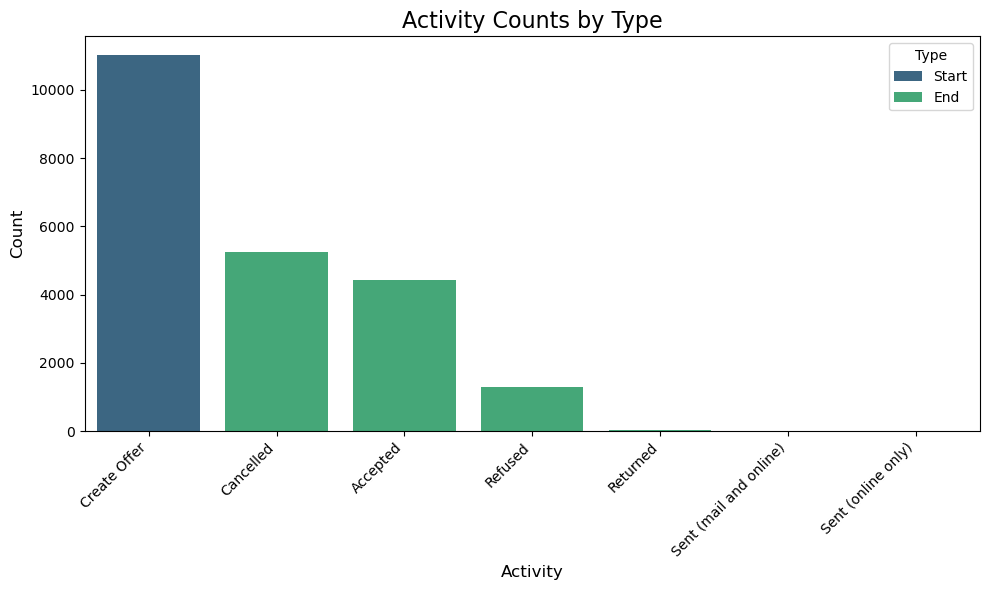

In [15]:
# TODO can we add logarithmic scale?
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Activity', y='Count', hue='Type', palette='viridis') # , log_scale=True) 

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Activity Counts by Type', fontsize=16)
plt.xlabel('Activity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
display(combined_df)

,Activity,Count,Type
0,Create Offer,11021,Start
1,Cancelled,5253,End
2,Accepted,4442,End
3,Refused,1293,End
4,Returned,16,End
5,Sent (mail and online),15,End
6,Sent (online only),2,End


## Process Exploration: Full Model
To understand the process, you want to create a process model.

(d) (1 point) As learned in your IDS course, the Inductive Miner guarantees that the
language of the model includes all traces in the event log. Do not actively set any
parameters for the Inductive Miner, i.e., leave them at their default values and just
pass the event log. Provide a Petri net model obtained from applying the Inductive
Miner using the entire event log as input.

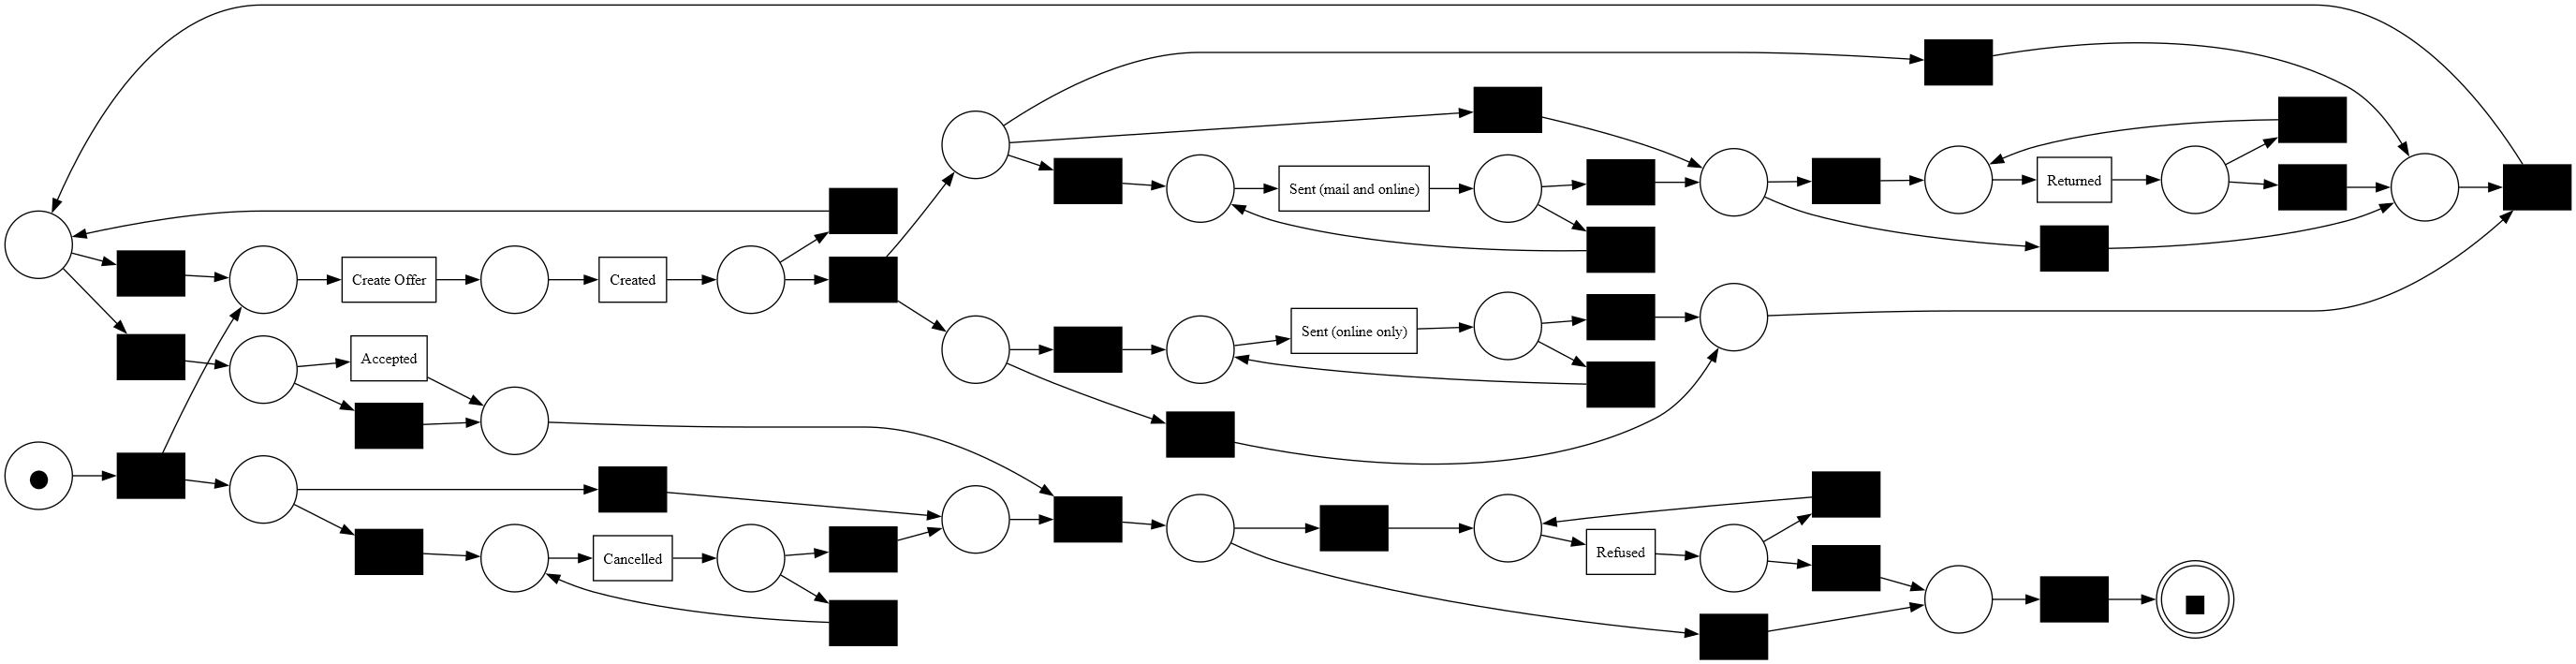

In [ ]:
# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(log_obj)

# you can also specify a format 
pm4py.view_petri_net(petri_net=net, initial_marking=im, final_marking=fm) 

## Process Exploration: Variants
Now you have understood the general nature of the process, you want to take a look at the
different variants present in the event log and the number of cases they represent.

(g) (1 point) Create a chart showing the percentage of cases that can be covered by
the minimum number of variants. The x-axis should show the number of variants
(ordered from left to right by their frequency) and the y-axis should depict the relative
accumulated number of cases. Make sure to label your axes and provide a title for the
plot.

Hint: To determine each variant’s value on the y-axis you need to sort the variants by
the number of cases they cover (descending) before determining the accumulated sum
of the percentage of cases covered. We also recommend adding a count of zero cases
for a non-existent 0th variant to make the plot more expressive.

In [52]:
# Find all variants in 
variants = pm4py.get_variants_as_tuples(log_obj)

# sort by frequency & display the most frequent one
variants_sorted = sorted(variants.items(), key=lambda x: x[1], reverse=True)

num_cases = len(cases)
num_variants = len(variants_sorted)
display(num_variants)
variants_df = pd.DataFrame(variants_sorted)
variants_df.loc[-1] = ["()", 0]  # adding a row
variants_df.index = variants_df.index + 1  # shifting index
variants_df.sort_index(inplace=True)

variant_acc = 0
# for variant in variants_sorted:
#    variant[2] = variants_acc + variant[1]
#     display(variant[2])
variants_df.rename(columns={0:"Traces", 1:"Occurences"}, inplace=True)
# variants_df["Covered Traces"] = variants_df.cumsum()
#display(num_variants)
variants_df["Accumulated"] = variants_df["Occurences"].cumsum()

display(variants_df)


476

,Traces,Occurences,Accumulated
0,(),0,0
1,"(Create Offer, Created, Sent (mail and online)...",4150,4150
2,"(Create Offer, Created, Sent (mail and online)...",2491,6641
3,"(Create Offer, Created, Sent (mail and online)...",941,7582
4,"(Create Offer, Created, Sent (mail and online)...",419,8001
...,...,...,...
472,"(Create Offer, Created, Cancelled, Create Offe...",1,11017
473,"(Create Offer, Created, Sent (mail and online)...",1,11018
474,"(Create Offer, Created, Sent (online only), Ca...",1,11019
475,"(Create Offer, Created, Create Offer, Created,...",1,11020


C:\Users\Joost\AppData\Local\Temp\ipykernel_29656\3132592639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=variants_df, x=variants_df.index, y='Accumulated', palette='viridis')


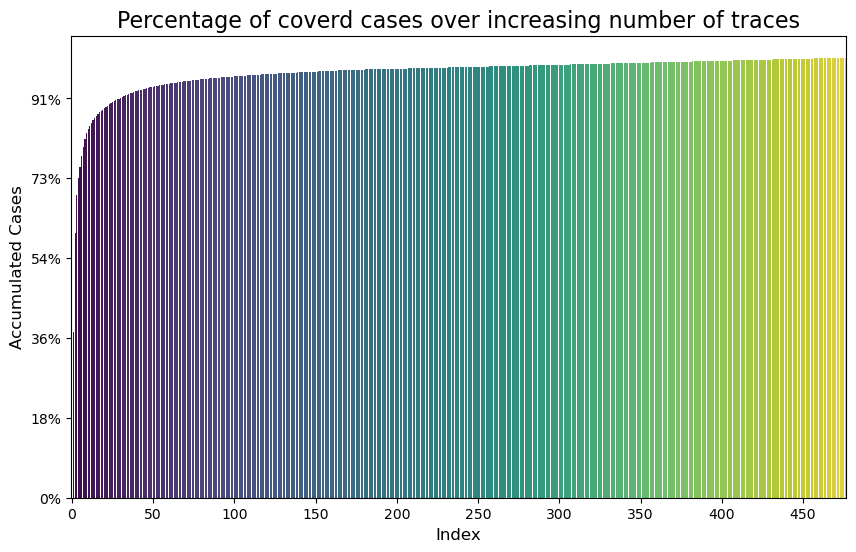

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=variants_df, x=variants_df.index, y='Accumulated', palette='viridis')


# Add titles and labels
plt.title('Percentage of coverd cases over increasing number of traces', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Accumulated Cases', fontsize=12)

# Convert y-axis to percentage
max_accumulated = variants_df['Accumulated'].max()
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y / max_accumulated) * 100:.0f}%'))

# Show the plot
# plt.tight_layout()
plt.xticks(ticks=range(0, len(variants_df), 50))
#plt.yticks(ticks=range(0, len(variants_df), 50))
plt.show()

(h) (1.5 points) Answer the following questions:
- What is the minimum number of variants you need to cover 85 % of cases?
- How high is the percentage of cases covered by the two most frequent variants?
- How many variants represent fewer than 10 cases?

In [81]:
cases_to_cover = num_cases * 0.85
display(f"{num_cases=}")
display(f"{cases_to_cover=}")

index = variants_df[variants_df['Accumulated'] < cases_to_cover].index.max() + 1


display(index)
display(variants_df.loc[[index]])

'num_cases=11021'

'cases_to_cover=9367.85'

12

,Traces,Occurences,Accumulated
12,"(Create Offer, Created, Sent (online only), Re...",76,9395


In [88]:
display(variants_df.loc[[1]]['Occurences'] + variants_df.loc[[2]]['Occurences'])
display(variants_df.head())
display((4150 + 2491) / num_cases * 100)

1   NaN
2   NaN
Name: Occurences, dtype: float64

,Traces,Occurences,Accumulated
0,(),0,0
1,"(Create Offer, Created, Sent (mail and online)...",4150,4150
2,"(Create Offer, Created, Sent (mail and online)...",2491,6641
3,"(Create Offer, Created, Sent (mail and online)...",941,7582
4,"(Create Offer, Created, Sent (mail and online)...",419,8001


60.25768986480355

In [93]:
display((variants_df['Occurences'] < 10).sum())


428

## Process Model
Your previous process model describes all behavior seen in the data; resulting in a very
large and hard to read process model. Now you want to create a simpler model that only
shows the most frequent behavior.

(i) (2.5 points) Provide a Petri net model obtained from applying the Inductive Miner
using an event log only containing the traces of the five most frequent variants. Do
not actively set any parameters for the Inductive Miner—leave them at their default
values and just pass the filtered event log as input. How is this model’s token-based
replay fitness (log_fitness) on the full event log?

,concept:name,time:timestamp,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,@@index,@@case_index
0,Create Offer,2016-04-04 16:12:03.476000+00:00,0.0,111.0,True,500.00,False,0.0,45000.0,NaN,Car,New credit,Application_1000311556,45000.0,0,0
1,Created,2016-04-04 16:12:04.732000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,1,0
2,Sent (mail and online),2016-04-04 16:15:45.527000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,2,0
3,Cancelled,2016-05-05 06:00:48.950000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_2032690166,Car,New credit,Application_1000311556,45000.0,3,0
4,Create Offer,2016-02-26 14:00:45.194000+00:00,577.0,120.0,False,56.30,True,824.0,5000.0,NaN,Existing loan takeover,New credit,Application_100034150,5000.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68276,Create Offer,2016-08-18 15:18:28.387000+00:00,20000.0,85.0,True,273.49,True,1064.0,20000.0,NaN,Existing loan takeover,New credit,Application_999487618,20000.0,68276,11018
68277,Created,2016-08-18 15:18:29.038000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_211963320,Existing loan takeover,New credit,Application_999487618,20000.0,68277,11018
68278,Sent (mail and online),2016-08-18 15:22:44.940000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_211963320,Existing loan takeover,New credit,Application_999487618,20000.0,68278,11018
68279,Returned,2016-08-25 08:53:07.648000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_211963320,Existing loan takeover,New credit,Application_999487618,20000.0,68279,11018


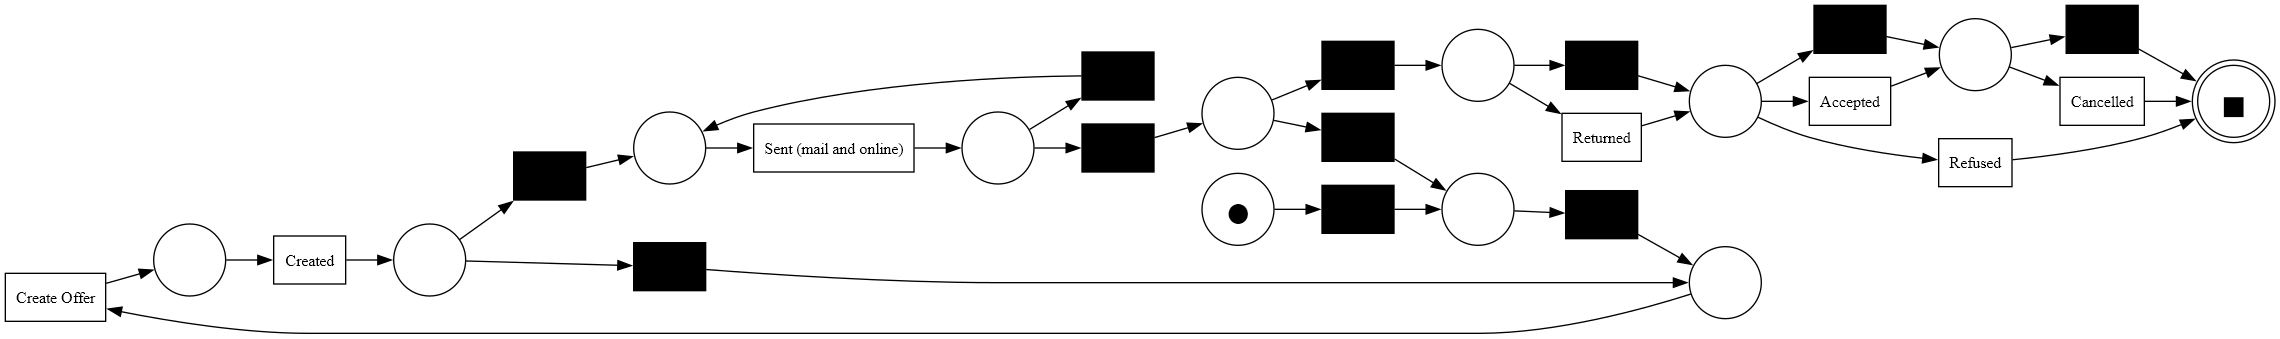

In [125]:
# Filtering the log objekt by the top 5 traces
filtered_dataframe = pm4py.filter_variants_top_k(
    log_obj,
    5,
    activity_key='concept:name',
    timestamp_key='time:timestamp',
    case_id_key='case:concept:name'
)
# display(filtered_dataframe)

# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(filtered_dataframe)

# you can also specify a format 
pm4py.view_petri_net(petri_net=net, initial_marking=im, final_marking=fm) 

In [126]:
fitness_measures = pm4py.conformance.fitness_token_based_replay(log=log_obj, petri_net=net, initial_marking=im, final_marking=fm)
display(fitness_measures)

replaying log with TBR, completed traces ::   0%|          | 0/476 [00:00<?, ?it/s]

{'perc_fit_traces': 77.8332274748208,
 'average_trace_fitness': 0.9828988471844935,
 'log_fitness': 0.9769116889804326,
 'percentage_of_fitting_traces': 77.8332274748208}

In [122]:
# Get the top 5 traces
display(variants_df.columns)
display(variants_df.head())
top_traces = variants_df.iloc[1:6]["Traces"].to_list()

display(top_traces)

# filtered_variants = variants_df[variants_df["Traces"] in ]
# display(type(top_traces[1]))
# bdisplay(type(variants_df["Traces"].values))
filtered = pd.DataFrame(columns=variants_df.columns)

display(filtered)

Index(['Traces', 'Occurences', 'Accumulated'], dtype='object')

,Traces,Occurences,Accumulated
0,(),0,0
1,"(Create Offer, Created, Sent (mail and online)...",4150,4150
2,"(Create Offer, Created, Sent (mail and online)...",2491,6641
3,"(Create Offer, Created, Sent (mail and online)...",941,7582
4,"(Create Offer, Created, Sent (mail and online)...",419,8001


[('Create Offer', 'Created', 'Sent (mail and online)', 'Returned', 'Accepted'),
 ('Create Offer', 'Created', 'Sent (mail and online)', 'Cancelled'),
 ('Create Offer', 'Created', 'Sent (mail and online)', 'Returned', 'Refused'),
 ('Create Offer',
  'Created',
  'Sent (mail and online)',
  'Create Offer',
  'Created',
  'Sent (mail and online)',
  'Returned',
  'Accepted',
  'Cancelled'),
 ('Create Offer',
  'Created',
  'Create Offer',
  'Created',
  'Sent (mail and online)',
  'Sent (mail and online)',
  'Returned',
  'Accepted',
  'Cancelled')]

,Traces,Occurences,Accumulated


(j) (1 point) Create a histogram of the individual trace fitness values as reported by the
conformance diagnostics (for token-based replay). Use the bins provided in the Jupyter
notebook. Make sure to label your axes and provide a title for the plot.

(k) (2 points) The five most frequent variants cover approximately 75.25 % of cases and
the Inductive Miner guarantees that the model fits for all of these cases. However, (1)
the percentage of fitting traces is significantly higher than this, and (2) the fitness of
the full event log is also a lot higher than just the percentage of fitting traces. Use your
knowledge on the valid traces of discovered models and token-based replay to explain
these two phenomena in 1–2 sentences each. You may refer to the plot created in the
previous question.

## Performance Analysis
Finally, you want to consider the mean throughput time (duration) of executing the different
frequent variants.

(l) (2.5 points) Provide a bar chart showing the mean throughput time (in days) of the
35 most frequent variants and the number of cases covered by each variant. The x-axis
should show the number of cases and the y-axis the mean throughput time. Each of
the individual bars should represent a variant, where the width is the number of cases
covered by the variant and the height is the variant’s mean throughput time in days.
Order the bars according to the number of cases covered by the variant (most frequent
variant on the left). Make sure to label your axes and provide a title for the plot.
What are the mean throughput times (in days) of the two most frequent variants?

(m) (1.5 points) Considering the mean throughput times per variant (only considering the
35 most frequent variants), you suspect the number of offers created per variant might
have an impact on the throughput time. Create a suitable boxplot showing the mean
throughput time (y-axis) per variant with regard to the number of offers made per
variant (x-axis). Make sure to label your axes and provide a title for the plot. Does
the plot show an indication on how the number of offers a customer is presented with
affects the throughput time?

C:\Users\Joost\AppData\Local\Temp\ipykernel_29656\969281753.py:1: DeprecatedWarning: discover_petri_net_alpha_plus is deprecated as of 2.3.0 and will be removed in 3.0.0. This method will be removed in a future release.
  net, im, fm = pm4py.discovery.discover_petri_net_alpha_plus(log_obj)


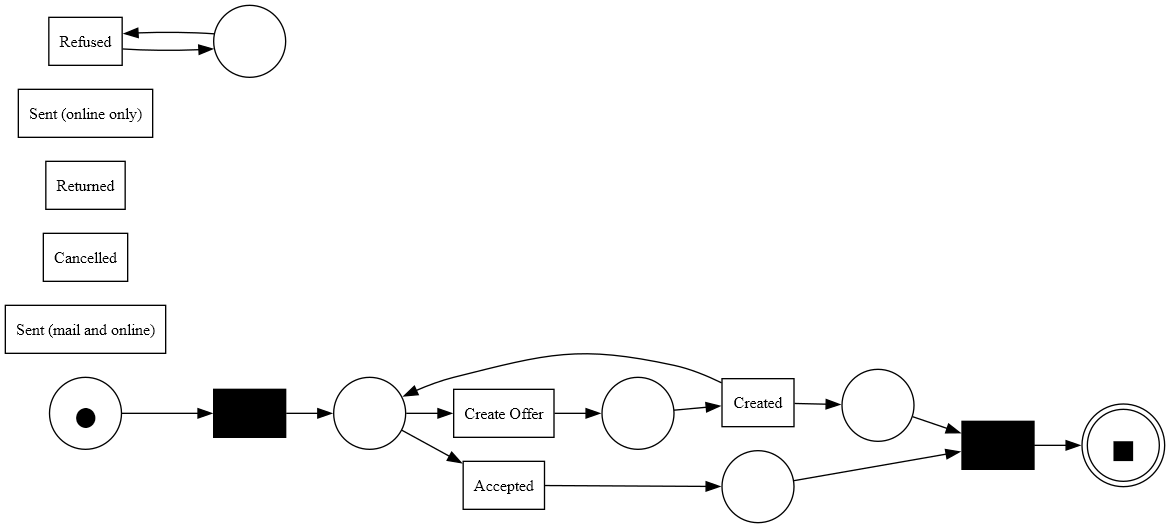

In [20]:
net, im, fm = pm4py.discovery.discover_petri_net_alpha_plus(log_obj)
pm4py.view_petri_net(petri_net=net, initial_marking=im, final_marking=fm) 

In [21]:
pm4py.save_vis_petri_net(petri_net=net, initial_marking=im, final_marking=fm, file_path="petri_net.svg")

''

In [22]:
# proc_tree = pm4py.discover_process_tree_inductive(log_obj)

In [23]:
# pm4py.view_process_tree(proc_tree)

In [24]:
# transition_system = pm4py.discovery.discover_transition_system(log_obj, direction='forward')
# pm4py.view_transition_system(transition_system)

start_activities['start_activities'] = 'start_activities'
end_activities['end_activities'] = 'end_activities'
df1 = pd.DataFrame(start_activities)
df1['Position'] = 'start_activities'

df2 = pd.DataFrame(end_activities)
df2['Position'] = 'end_activities'

df1['start_activities'] = 'start_activities'
df2['end_activities'] = 'end_activities'
display

combined_df.drop(index=1, inplace=True)

plt.figure(figsize=(10, 6))

sorted_activites = log_obj['concept:name'].value_counts().index

sns.countplot(data=df, x='Activity', hue='Type', order=sorted_activites )

plt.title('Frequency of Activities being start or end nodes')
plt.xlabel('Activity')
plt.ylabel('Frequency')
plt.xticks(rotation=30)
plt.show()
